In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np


# Read a jsonl file
def read_jsonl(file_path):
    data = []
    with open(file_path, "r") as file:
        for line in file:
            data.append(json.loads(line))
    return data


def replace_none_with_zero(data):
    for i in range(len(data)):
        if data[i] is None:
            data[i] = 0
    return np.array(data, dtype=float)


def get_eval_metrics(file_path):
    data = read_jsonl(file_path)

    faithfulness_correct = []
    relevance_correct = []
    faithfulness = []
    relevance = []
    for res in data:
        faithfulness_correct.append(res["faithfulness_correct"])
        relevance_correct.append(res["relevance_correct"])
        faithfulness.append(res["faithfulness"])
        relevance.append(res["relevance"])

    faithfulness_correct = replace_none_with_zero(faithfulness_correct)
    relevance_correct = replace_none_with_zero(relevance_correct)
    faithfulness = replace_none_with_zero(faithfulness)
    relevance = replace_none_with_zero(relevance)

    # Calculate the average scores
    avg_faithfulness_correct = (sum(faithfulness_correct) / len(faithfulness_correct)) * 100
    avg_relevance_correct = (sum(relevance_correct) / len(relevance_correct)) * 100
    avg_faithfulness = sum(faithfulness) / len(faithfulness)
    avg_relevance = sum(relevance) / len(relevance)
    return [
        avg_faithfulness_correct.item(),
        avg_relevance_correct.item(),
        avg_faithfulness.item(),
        avg_relevance.item(),
    ]

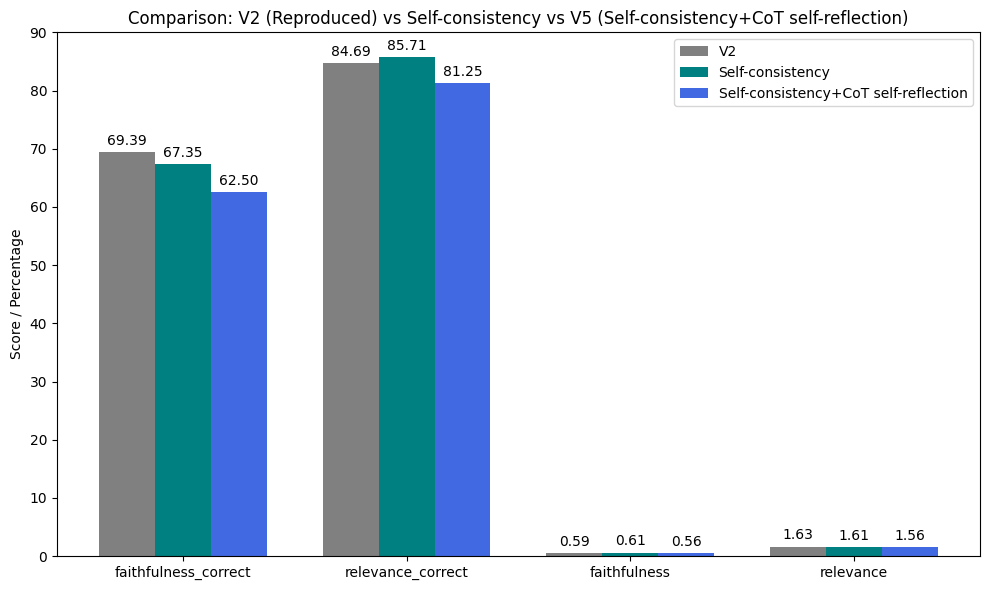

In [2]:
# Categories
categories = ["faithfulness_correct", "relevance_correct", "faithfulness", "relevance"]

# Scores for each method
v2_reproduced = get_eval_metrics("Snowflake100+Routing+Prune+Rerank_reproduced_2/testset-50q-eval.jsonl")
v3 = get_eval_metrics("Snowflake100+Routing+Prune+Rerank+Self-consistency/testset-50q-eval.jsonl")
v4 = get_eval_metrics("Snowflake100+Routing+Prune+Rerank+Self-consistency+CoT self-reflection/testset-50q-eval.jsonl")

x = np.arange(len(categories))  # label locations
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, v2_reproduced, width, label="V2", color="gray")
rects2 = ax.bar(x, v3, width, label="Self-consistency", color="teal")
rects3 = ax.bar(x + width, v4, width, label="Self-consistency+CoT self-reflection", color="royalblue")

# Labels and title
ax.set_ylabel("Score / Percentage")
ax.set_title("Comparison: V2 (Reproduced) vs Self-consistency vs V5 (Self-consistency+CoT self-reflection)")
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()


# Add labels
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(
            f"{height:.2f}",
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(0, 3),
            textcoords="offset points",
            ha="center",
            va="bottom",
        )


add_labels(rects1)
add_labels(rects2)
add_labels(rects3)

plt.tight_layout()
plt.show()